## Anomaly Detection SOM Experiment

Insert Code wherever represented with "#***************#"

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=3db7a759c5c4223588d910692fe3658d0dfc371ed3f86a52c360118b65de899d
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Minisom library and module is used for performing Self Organizing Maps 
from minisom import MiniSom 

In [2]:
# Loading Data 
data = pd.read_csv('Credit_Card_Applications.csv') 

# X  
data 

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
# Shape of the data: 
""" 
    Write Code to display shape of data
"""
#********************#
data.shape

(690, 16)

In [4]:
# Info of the data: 
""" 
    Write Code to display information of data using inbuilt info function
"""
#********************#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
# Defining X variables for the input of SOM 
X = data.iloc[:, 1:14].values 
y = data.iloc[:, -1].values 

# X variables: 
""" 
    Convert X variable into a pandas DataFrame
"""
#********************#
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [7]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler(feature_range = (0, 1)) 
""" 
    apply fit_transform using the created MinMaxScaler sc on variable X 
"""
X = sc.fit_transform(X)# Write Code
pd.DataFrame(X) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [8]:
# Set the hyper parameters 
som_grid_rows = 10 
som_grid_columns = 10 
iterations = 20000 
sigma = 1 
learning_rate = 0.5 

# define SOM: 
""" 
    Create MiniSom Model using above hyperparemeters with
    x = som_grid_rows
    y = som_grid_columns
    sigma = sigma
    input_len = 13
    and learning_rate = learning_rate
"""
som =MiniSom(x=som_grid_rows,y=som_grid_columns,sigma=sigma,learning_rate=learning_rate,input_len=13) # Declare MiniSom Model 
# input len 13 from this line of code X = data.iloc[:, 1:14].values 

In [9]:
# Initializing the weights 
som.random_weights_init(X) 

# Training 
"""
    Train som model using train_random on varible X for above mentioned iterations
"""
#********************#
som.train_random(X,iterations)

# Returns the distance map from the weights: 
som.distance_map() 

array([[0.17430905, 0.32768903, 0.31958662, 0.32734373, 0.4103992 ,
        0.38877808, 0.30873731, 0.36874195, 0.2468603 , 0.18816286],
       [0.45023085, 0.73092333, 0.63098291, 0.50214927, 0.54003064,
        0.56680495, 0.78314611, 0.50739615, 0.46489177, 0.41730963],
       [0.50069408, 0.8292718 , 0.72786428, 0.6717059 , 0.65257323,
        0.69837444, 0.95857394, 0.74412531, 0.65630008, 0.45511167],
       [0.32267179, 0.52303858, 1.        , 0.96189757, 0.62291526,
        0.77757909, 0.73940755, 0.84074428, 0.741526  , 0.49239202],
       [0.30280662, 0.57907984, 0.67322953, 0.61149179, 0.67661147,
        0.54790144, 0.60279551, 0.61048248, 0.56328418, 0.43231715],
       [0.40763795, 0.58994758, 0.83122493, 0.53220674, 0.59316426,
        0.4980697 , 0.5997729 , 0.58751402, 0.58215145, 0.25564221],
       [0.48790579, 0.81318298, 0.76573878, 0.69202196, 0.5541578 ,
        0.7685494 , 0.56983137, 0.71386852, 0.48910131, 0.2821142 ],
       [0.50218292, 0.84807083, 0.7534808

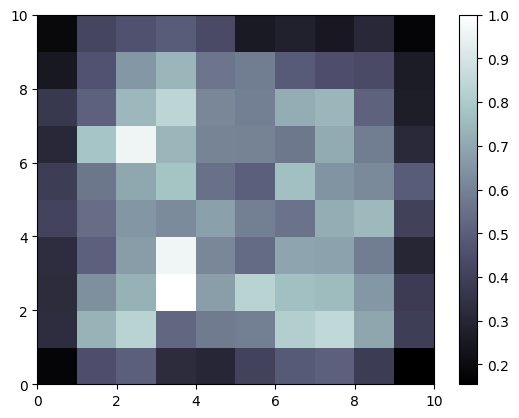

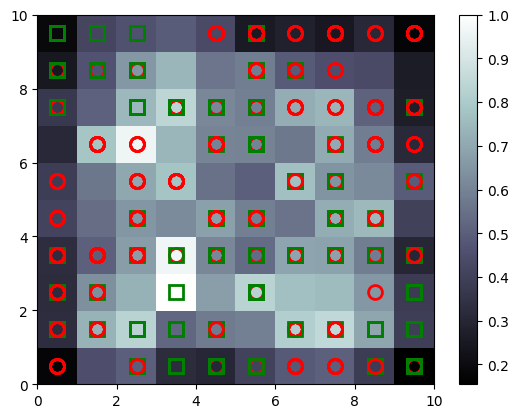

In [10]:
from pylab import plot, axis, show, pcolor, colorbar, bone 

bone() 
pcolor(som.distance_map().T)       # Distance map as background 
colorbar() 
show() 
bone() 
pcolor(som.distance_map().T) 
colorbar() #gives legend 

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square 
colors = ['r', 'g'] 

for i, x in enumerate(X): 
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2) 

show() 

In [11]:
"""
    Write code to store som win_map into a variable names mappings
"""
mappings = som.win_map(X) #********************#
mappings 
mappings.keys() 
"""
    Write code to find the length of mapping.keys()
"""
#********************#
len(mappings.keys())

77

In [12]:
mappings[(9,8)] 
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0) 
frauds 

array([[1.        , 0.29203008, 0.03571429, 0.5       , 1.        ,
        0.375     , 0.02631579, 1.        , 1.        , 0.10447761,
        1.        , 0.5       , 0.17      ],
       [1.        , 0.15669173, 0.03125   , 0.5       , 0.76923077,
        0.375     , 0.1622807 , 1.        , 1.        , 0.02985075,
        1.        , 0.5       , 0.26      ],
       [1.        , 0.30706767, 0.055     , 0.5       , 0.92307692,
        0.375     , 0.05403509, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.26      ],
       [1.        , 0.17037594, 0.06107143, 0.5       , 1.        ,
        0.375     , 0.05842105, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.1975    ],
       [1.        , 0.12285714, 0.01928571, 0.        , 1.        ,
        0.375     , 0.00140351, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.42      ],
       [1.        , 0.38225564, 0.06107143, 0.5       , 1.        ,
        0.375     , 0.00438

In [14]:
# the list of customers who are frauds: 
"""
    Convert he fraud customers back into original values using Standard Scaler(sc) inverse_transform and store into a variable named frauds1
"""
frauds1 = sc.inverse_transform(frauds)#********************#
pd.DataFrame(frauds1) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,33.17,1.000,2.0,14.0,4.0,0.750,1.0,1.0,7.0,1.0,2.0,340.0
1,1.0,24.17,0.875,2.0,11.0,4.0,4.625,1.0,1.0,2.0,1.0,2.0,520.0
2,1.0,34.17,1.540,2.0,13.0,4.0,1.540,1.0,1.0,1.0,1.0,2.0,520.0
3,1.0,25.08,1.710,2.0,14.0,4.0,1.665,1.0,1.0,1.0,1.0,2.0,395.0
4,1.0,21.92,0.540,1.0,14.0,4.0,0.040,1.0,1.0,1.0,1.0,2.0,840.0
5,1.0,39.17,1.710,2.0,14.0,4.0,0.125,1.0,1.0,5.0,1.0,2.0,480.0
6,1.0,39.00,5.000,2.0,13.0,4.0,3.500,1.0,1.0,10.0,1.0,2.0,0.0
7,1.0,31.57,4.000,2.0,14.0,4.0,5.000,1.0,1.0,3.0,1.0,2.0,290.0
8,1.0,19.67,0.375,2.0,11.0,4.0,2.000,1.0,1.0,2.0,1.0,2.0,80.0
9,1.0,23.25,1.500,2.0,11.0,4.0,2.375,1.0,1.0,3.0,1.0,2.0,0.0
